# Пракитеческий пример сегментации бинаризацией.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget https://i.ebayimg.com/images/g/dAYAAOSwaCBhZ2ZH/s-l1600.jpg -O coin.jpg

--2021-10-22 10:04:19--  https://i.ebayimg.com/images/g/dAYAAOSwaCBhZ2ZH/s-l1600.jpg
Resolving i.ebayimg.com (i.ebayimg.com)... 93.184.215.80
Connecting to i.ebayimg.com (i.ebayimg.com)|93.184.215.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104943 (102K) [image/jpeg]
Saving to: ‘coin.jpg’

coin.jpg            100%[===================>] 102.48K  --.-KB/s    in 0.008s  

2021-10-22 10:04:19 (12.7 MB/s) - ‘coin.jpg’ saved [104943/104943]



In [ ]:
img = cv2.imread('coin.jpg')

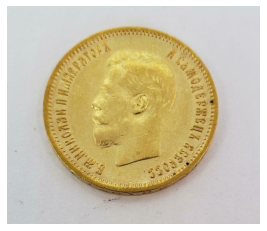

In [ ]:
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=plt.cm.binary)

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Переводим в rgb (opencv Загружает по-умолчанию в bgr)

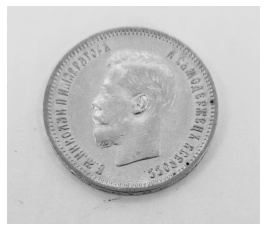

In [ ]:
plt.axis('off')
plt.imshow(img_gray, cmap=plt.cm.gray)

Выбираем границу (трешхолд)

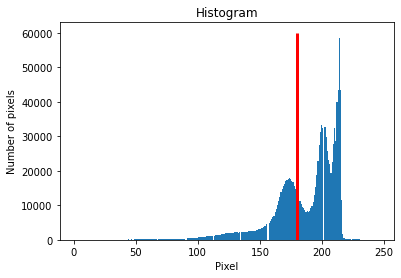

In [ ]:
fig, ax = plt.subplots()
ax.hist(img_gray.ravel(), bins=256)
ax.set_title('Histogram')
ax.set_xlabel('Pixel')
ax.set_ylabel('Number of pixels')
ax.vlines(x=180, ymin=0, ymax=6e4, linewidth=3, color='r', linestyle='-')
plt.show()

In [ ]:
img_bin = (img_gray > 180)

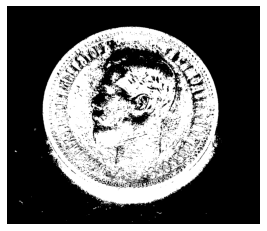

In [ ]:
plt.axis('off')
plt.imshow(img_bin, cmap=plt.cm.binary)

## Задание

In [ ]:
!wget https://dubllikat.ru/images/price/rus-jir.jpg -O plate.jpg

--2021-10-22 10:04:20--  https://dubllikat.ru/images/price/rus-jir.jpg
Resolving dubllikat.ru (dubllikat.ru)... 87.236.16.124
Connecting to dubllikat.ru (dubllikat.ru)|87.236.16.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20449 (20K) [image/jpeg]
Saving to: ‘plate.jpg’

plate.jpg           100%[===================>]  19.97K  --.-KB/s    in 0s      

2021-10-22 10:04:22 (66.2 MB/s) - ‘plate.jpg’ saved [20449/20449]



In [ ]:
img = cv2.imread('plate.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.GaussianBlur(img_gray, (7, 7), 0)

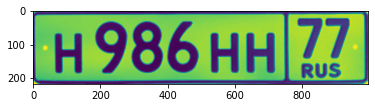

In [ ]:
plt.imshow(img_gray)

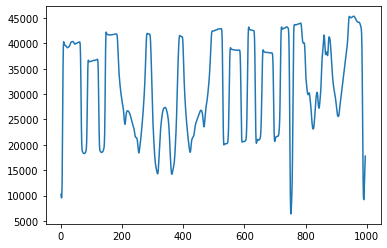

In [ ]:
plt.plot(range(img_gray.shape[1]), np.sum(img_gray, axis=0))

In [ ]:
(T, threshInv) = cv2.threshold(img_gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)

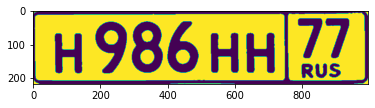

In [ ]:
plt.imshow(threshInv)

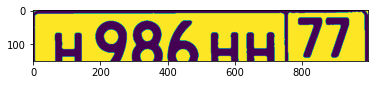

In [ ]:
plt.imshow(threshInv[:150, :])

In [ ]:
threshInv = threshInv[:150, :]

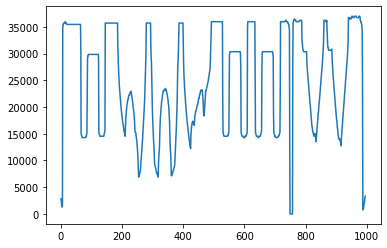

In [ ]:
plt.plot(range(threshInv.shape[1]), np.sum(threshInv, axis=0))

In [ ]:
x = np.sum(threshInv, axis=0)

In [ ]:
from scipy.signal import find_peaks

In [ ]:
peaks, _ = find_peaks(x, height=35000, distance=50)

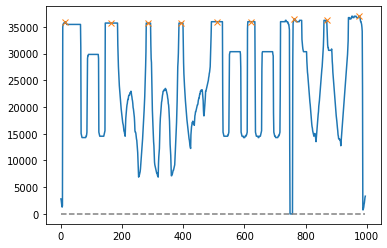

In [ ]:
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

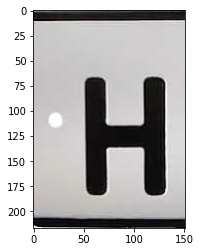

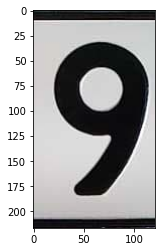

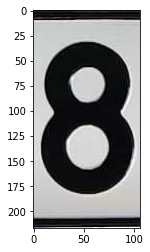

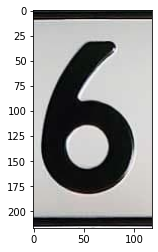

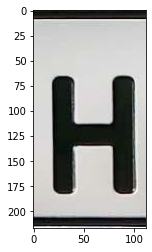

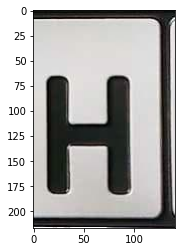

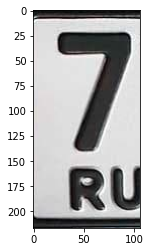

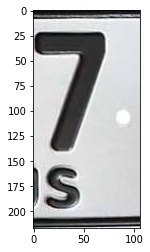

In [ ]:
for i in range(len(peaks)-1):
  plt.imshow(img[:, peaks[i]:peaks[i+1]])
  plt.show()